In [1]:
import numpy as np
import pandas as pd
from importlib import reload
import custom_plot_v3
reload(custom_plot_v3)
from custom_plot_v3 import CustomPlot as CP
from datetime import datetime

In [19]:
base_path = 'data/'
file = base_path+'yields_weather_1970_2015.csv'
plot_path = 'test/'

In [3]:
raw_data = pd.read_csv(file)
raw_data.head()

Unnamed: 0  County  Year  Month  Day State  Precipitation (in)  \
0           1   17001  1970      8   26    IL            0.000000   
1           2   17001  1970      4   20    IL            0.223333   
2           3   17001  1970      8   18    IL            0.526667   
3           4   17001  1970      7   16    IL            0.000000   
4           5   17001  1970      8   30    IL            0.000000   

   Average Temperature (F)  Annual Corn Yield (BU/ACRE)  \
0                74.000000                         79.0   
1                48.333333                         79.0   
2                78.500000                         79.0   
3                71.833333                         79.0   
4                81.125000                         79.0   

   Growing Degree Days (Base: 50F)  Annual Acres Harvested - Corn  \
0                        24.000000                       120200.0   
1                         0.000000                       120200.0   
2                        28.500000                       120200.0   
3                        21.833333                       120200.0   
4                        31.125000                       120200.0   

   Annual.Wheat.Yield..BU.ACRE.  Annual.soybeans.Yield..BU.ACRE.  
0                          34.0                             32.5  
1                          34.0                             32.5  
2                          34.0                             32.5  
3                          34.0                             32.5  
4                          34.0                             32.5

In [4]:
raw_data.shape

(13434241, 13)

In [5]:
raw_data.rename(columns={'County':'county','Year':'year','Month':'month','Day':'day','State':'state',
                         'Precipitation (in)':'precipitation','Average Temperature (F)':'temperature',
                         'Annual Corn Yield (BU/ACRE)':'corn_yield','Growing Degree Days (Base: 50F)':'growing_degree_days',
                         'Annual Acres Harvested - Corn':'annual_acres_harvested_corn',
                         'Annual.Wheat.Yield..BU.ACRE.':'wheat_yield','Annual.soybeans.Yield..BU.ACRE.':'soybeans_yield'},
                inplace=True)
raw_data.head()

Unnamed: 0  county  year  month  day state  precipitation  temperature  \
0           1   17001  1970      8   26    IL       0.000000    74.000000   
1           2   17001  1970      4   20    IL       0.223333    48.333333   
2           3   17001  1970      8   18    IL       0.526667    78.500000   
3           4   17001  1970      7   16    IL       0.000000    71.833333   
4           5   17001  1970      8   30    IL       0.000000    81.125000   

   corn_yield  growing_degree_days  annual_acres_harvested_corn  wheat_yield  \
0        79.0            24.000000                     120200.0         34.0   
1        79.0             0.000000                     120200.0         34.0   
2        79.0            28.500000                     120200.0         34.0   
3        79.0            21.833333                     120200.0         34.0   
4        79.0            31.125000                     120200.0         34.0   

   soybeans_yield  
0            32.5  
1            32.5  
2            32.5  
3            32.5  
4            32.5

In [6]:
req_cols = ['county','year','month','day','state','precipitation','temperature','corn_yield','wheat_yield','soybeans_yield']
filtered_data = raw_data[req_cols]
filtered_data = filtered_data.sort_values(['state','county','year','month','day'])
filtered_data.reset_index(drop=True,inplace=True)
filtered_data.head()

county  year  month  day state  precipitation  temperature  corn_yield  \
0   19001  1970      1    1    IA           0.03         22.0        84.1   
1   19001  1970      1    2    IA           0.03         11.5        84.1   
2   19001  1970      1    3    IA            NaN          9.0        84.1   
3   19001  1970      1    4    IA           0.00         15.5        84.1   
4   19001  1970      1    5    IA           0.00          5.0        84.1   

   wheat_yield  soybeans_yield  
0          NaN            33.9  
1          NaN            33.9  
2          NaN            33.9  
3          NaN            33.9  
4          NaN            33.9

In [7]:
print('county',len(filtered_data.county.unique()))
print('state',len(filtered_data.state.unique()))

county 841
state 9


In [8]:
gp_data = filtered_data.groupby(['state'])
keys = list(gp_data.groups.keys())
print(keys)

['IA', 'IL', 'IN', 'KS', 'MN', 'MO', 'NE', 'OH', 'SD']


In [9]:
def get_average_result(input_data):
    print(datetime.now(),'get_avg_result')
    avg_result = input_data.groupby(['year']).agg({'temperature':'mean','precipitation':'mean',
                                      'corn_yield':'mean','wheat_yield':'mean','soybeans_yield':'mean'})
    return avg_result.reset_index()

def least_square_residual(c, x, y, fit_func):
    return fit_func(c,x) - y
fit_func = lambda c,x:c[1]*x+c[0]

def calculate_rsquare(observed, predicted):
    mean = np.mean(observed)
    ss_total = sum((observed-mean)**2)
    ss_res = sum((observed-predicted)**2)
    r_square = 1.0-(ss_res/ss_total)
    #print('r_square',r_square)
    return r_square
    
def generate_yield_vs_year_plot(data,color_idx,key,metric):
    print(datetime.now(),'generate_yield_vs_year_plot')
    color = 'q'+str(color_idx)
    
    d = data.dropna(subset=['corn_yield'])
    least_square_coeff = np.ones(2)*0.01
    data_dict = {'x':d['year'],
                 'y':d['corn_yield'],
                 'x_label':'Year',
                 'y_label':'Mean corn yield (bu/acre)','pattern':'o',
                 'color':color,
                 'markerfacecolor':color,
                 'markersize':6,
                 'least_square_coeff':least_square_coeff,
                 'least_square_residual':least_square_residual,
                 'fit_func':fit_func,
                 'text':key,
                 'text_loc':[0.05,0.95],
                 #'text_color':'c1',
                 'file_path':plot_path + metric+'_corn_yield_vs_year_'+key}
    corn_res = CP().generate_plot(data_dict)
    
    d = data.dropna(subset=['soybeans_yield'])
    least_square_coeff = np.ones(2)*0.01
    data_dict = {'x':d['year'],
                 'y':d['soybeans_yield'],
                 'x_label':'Year',
                 'y_label':'Mean soybeans yield (bu/acre)','pattern':'o',
                 'color':color,
                 'markerfacecolor':color,
                 'markersize':6,
                 'least_square_coeff':least_square_coeff,
                 'least_square_residual':least_square_residual,
                 'fit_func':fit_func,
                 'text':key,
                 'text_loc':[0.05,0.95],
                 #'text_color':'c1',
                 'file_path':plot_path + metric+'_soybeans_yield_vs_year_'+key}
    soybeans_res = CP().generate_plot(data_dict)
    return {'corn_res':corn_res, 'soybeans_res':soybeans_res}
    
def generate_all_plots(metric, metric_func, input_data):
    print(datetime.now(),'generate_all_plots')
    gp_data = input_data.groupby(['state'])
    keys = list(gp_data.groups.keys())
    print(keys)
    idx = 1
    records = []
    for key in keys:
        data = gp_data.get_group(key)
        plot_data = metric_func(data)
        res = generate_yield_vs_year_plot(plot_data,idx,key,metric)
        idx += 1
        records.append([key,res])
    return records

2019-05-01 21:37:25.275537 generate_all_plots
['IA', 'IL', 'IN', 'KS', 'MN', 'MO', 'NE', 'OH', 'SD']
2019-05-01 21:37:26.429274 get_avg_result
2019-05-01 21:37:26.486335 generate_yield_vs_year_plot


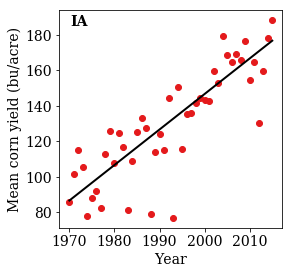

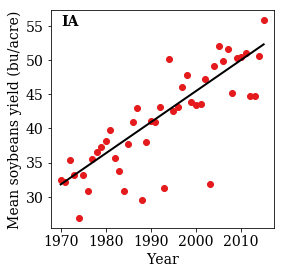

2019-05-01 21:37:27.104539 get_avg_result
2019-05-01 21:37:27.174647 generate_yield_vs_year_plot


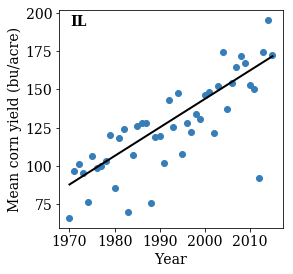

2019-05-01 21:37:27.845180 get_avg_result
2019-05-01 21:37:27.896283 generate_yield_vs_year_plot


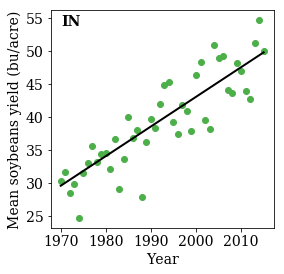

2019-05-01 21:37:28.535184 get_avg_result
2019-05-01 21:37:28.593304 generate_yield_vs_year_plot


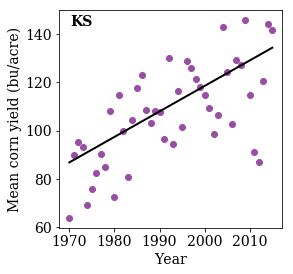

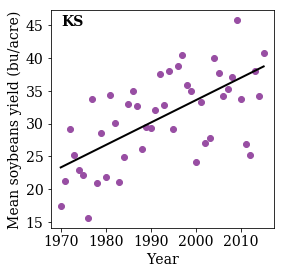

2019-05-01 21:37:29.188129 get_avg_result
2019-05-01 21:37:29.237027 generate_yield_vs_year_plot


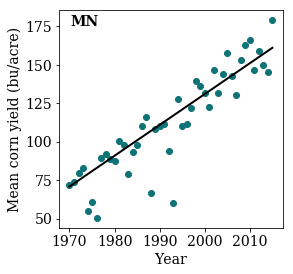

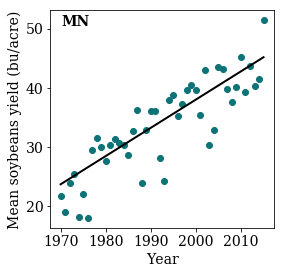

2019-05-01 21:37:30.015331 get_avg_result
2019-05-01 21:37:30.072758 generate_yield_vs_year_plot


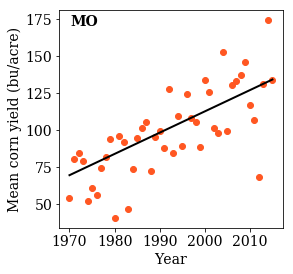

2019-05-01 21:37:31.108438 get_avg_result
2019-05-01 21:37:31.160414 generate_yield_vs_year_plot


2019-05-01 21:37:31.766155 get_avg_result
2019-05-01 21:37:31.840643 generate_yield_vs_year_plot


2019-05-01 21:37:32.574835 get_avg_result
2019-05-01 21:37:32.610842 generate_yield_vs_year_plot


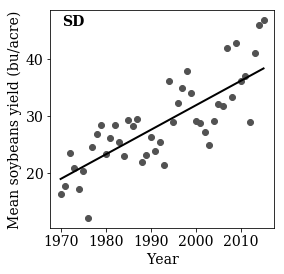

In [10]:
ls_res = generate_all_plots('average',get_average_result,filtered_data)

In [11]:
corn_data_dict_list = []
soybeans_data_dict_list = []
for idx in range(len(ls_res)):
    data_dict = {'x':ls_res[idx][1]['corn_res']['x'],
                 'y':ls_res[idx][1]['corn_res']['ls_pred'],
                 'color':'q'+str(idx+1),
                 'label':ls_res[idx][0]}
    corn_data_dict_list.append(data_dict)
    data_dict = {'x':ls_res[idx][1]['soybeans_res']['x'],
                 'y':ls_res[idx][1]['soybeans_res']['ls_pred'],
                 'color':'q'+str(idx+1),
                 'label':ls_res[idx][0]}
    soybeans_data_dict_list.append(data_dict)

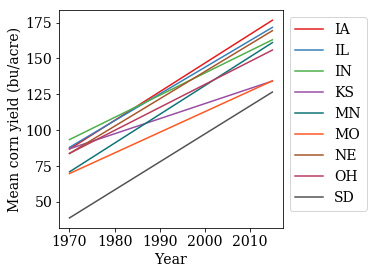

In [12]:
CP().generate_plot_multi(corn_data_dict_list,
                         file_path=plot_path+'LS_lines_corn',
                         bbox_to_anchor=(1.0,1.0),
                         xlabel='Year',
                         ylabel='Mean corn yield (bu/acre)')

In [13]:
CP().generate_plot_multi(soybeans_data_dict_list,
                         file_path=plot_path+'LS_lines_soybeans',
                         bbox_to_anchor=(1.0,1.0),
                         xlabel='Year',
                         ylabel='Mean soybeans yield (bu/acre)')

In [14]:
print('corn')
d = []
r = []
for idx in range(len(ls_res)):
    r2 = calculate_rsquare(ls_res[idx][1]['corn_res']['y'],ls_res[idx][1]['corn_res']['ls_pred'])
    print(ls_res[idx][0],ls_res[idx][1]['corn_res']['least_square_coeff'],r2)
    d.append(ls_res[idx][1]['corn_res']['least_square_coeff'][1])
    r.append(r2)
print('Slope','mean:',np.mean(d),'std:',np.std(d))
print('R2','mean:',np.mean(r),'std:',np.std(r))

print('soybeans')
d = []
r = []
for idx in range(len(ls_res)):
    r2 = calculate_rsquare(ls_res[idx][1]['soybeans_res']['y'],ls_res[idx][1]['soybeans_res']['ls_pred'])
    print(ls_res[idx][0],ls_res[idx][1]['soybeans_res']['least_square_coeff'],r2)
    d.append(ls_res[idx][1]['soybeans_res']['least_square_coeff'][1])
    r.append(r2)
print('Slope','mean:',np.mean(d),'std:',np.std(d))
print('R2','mean:',np.mean(r),'std:',np.std(r))

corn
IA [ -3.85204380e+03   1.99936272e+00] 0.691377879678
IL [ -3.58048247e+03   1.86211713e+00] 0.603416407552
IN [ -2.95835406e+03   1.54906594e+00] 0.569508059196
KS [ -1.98502278e+03   1.05172523e+00] 0.401025994984
MN [ -3.88044172e+03   2.00570184e+00] 0.790135400923
MO [ -2.76579748e+03   1.43928644e+00] 0.526432753387
NE [ -3.67086161e+03   1.90582398e+00] 0.829496572192
OH [ -3.07487577e+03   1.60333505e+00] 0.678100284841
SD [ -3.80975592e+03   1.95349011e+00] 0.806600328146
Slope mean: 1.70776760369 std: 0.304738192281
R2 mean: 0.6551215201 std: 0.135216781193
soybeans
IA [ -8.63711561e+02   4.54584014e-01] 0.647615241521
IL [ -8.18374525e+02   4.30676732e-01] 0.731481359432
IN [ -8.55447451e+02   4.49234645e-01] 0.753332158682
KS [ -6.51160150e+02   3.42368604e-01] 0.369280801175
MN [ -9.15839524e+02   4.76932079e-01] 0.714198097692
MO [ -6.18500616e+02   3.26463411e-01] 0.548526064757
NE [ -1.33515659e+03   6.90027265e-01] 0.843433653083
OH [ -8.86153230e+02   4.64020162e

In [15]:
gp_data = filtered_data.groupby(['state'])
IN_data = gp_data.get_group('IN')
county_gp = IN_data.groupby(['county'])
keys = list(county_gp.groups.keys())
print(keys)
key = keys[4]
data = county_gp.get_group(key)
plot_data = get_average_result(data)
#generate_temperature_vs_year_plot(plot_data,idx,key,metric)
data.head()

[18001, 18003, 18005, 18007, 18009, 18011, 18013, 18015, 18017, 18019, 18021, 18023, 18025, 18027, 18029, 18031, 18033, 18035, 18037, 18039, 18041, 18043, 18045, 18047, 18049, 18051, 18053, 18055, 18057, 18059, 18061, 18063, 18065, 18067, 18069, 18071, 18073, 18075, 18077, 18079, 18081, 18083, 18085, 18087, 18089, 18091, 18093, 18095, 18097, 18099, 18101, 18103, 18105, 18107, 18109, 18111, 18113, 18115, 18117, 18119, 18121, 18123, 18125, 18127, 18129, 18131, 18133, 18135, 18137, 18139, 18141, 18143, 18145, 18147, 18149, 18151, 18153, 18155, 18157, 18159, 18161, 18163, 18165, 18167, 18169, 18171, 18173, 18175, 18177, 18179, 18181, 18183]
2019-05-01 21:37:34.470387 get_avg_result


county  year  month  day state  precipitation  temperature  \
3406219   18009  1970      1    1    IN           0.03         26.5   
3406220   18009  1970      1    2    IN            NaN         23.5   
3406221   18009  1970      1    3    IN            NaN         18.0   
3406222   18009  1970      1    4    IN           0.02         12.5   
3406223   18009  1970      1    5    IN           0.02         12.5   

         corn_yield  wheat_yield  soybeans_yield  
3406219        82.2         36.8            30.1  
3406220        82.2         36.8            30.1  
3406221        82.2         36.8            30.1  
3406222        82.2         36.8            30.1  
3406223        82.2         36.8            30.1

In [16]:
whin_counties = [18131, 18181, 18017, 18007, 18015, 18157, 18171, 18045, 18107, 18023]

county_dict = {18131:'Pulaski', 
               18181:'White', 
               18017:'Cass', 
               18007:'Benton', 
               18015:'Carroll', 
               18157:'Tippecanoe', 
               18171:'Warren', 
               18045:'Fountain', 
               18107:'Montgomery', 
               18023:'Clinton'}

def generate_all_county_plots(metric, metric_func, input_data):
    print(datetime.now(),'generate_all_county_plots')
    idx = 1
    records = []
    gp_data = input_data.groupby(['county'])
    for key in whin_counties:
        print(key)
        data = gp_data.get_group(key)
        plot_data = metric_func(data)
        res = generate_yield_vs_year_plot(plot_data,idx,county_dict[key],metric)
        idx += 1
        records.append([key,res])
    return records

2019-05-01 21:37:34.505530 generate_all_county_plots
18131
2019-05-01 21:37:34.541145 get_avg_result
2019-05-01 21:37:34.545120 generate_yield_vs_year_plot


18181
2019-05-01 21:37:35.153309 get_avg_result
2019-05-01 21:37:35.156796 generate_yield_vs_year_plot


18017
2019-05-01 21:37:35.682504 get_avg_result
2019-05-01 21:37:35.686060 generate_yield_vs_year_plot


18007
2019-05-01 21:37:36.160754 get_avg_result
2019-05-01 21:37:36.164308 generate_yield_vs_year_plot


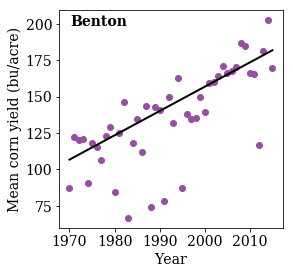

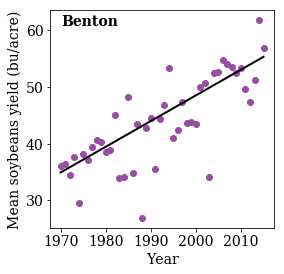

18015
2019-05-01 21:37:36.665853 get_avg_result
2019-05-01 21:37:36.669621 generate_yield_vs_year_plot


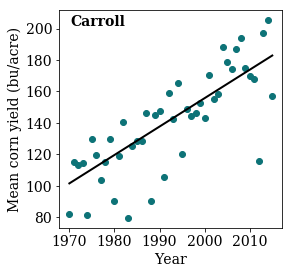

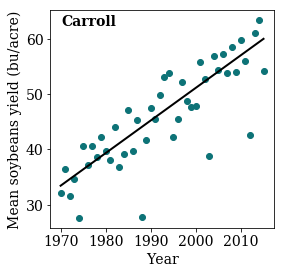

18157
2019-05-01 21:37:37.131634 get_avg_result
2019-05-01 21:37:37.135227 generate_yield_vs_year_plot


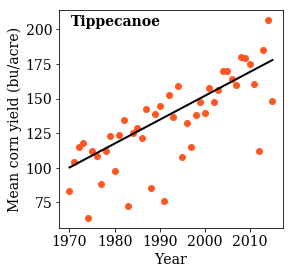

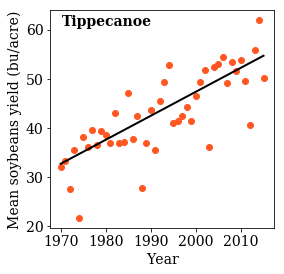

18171
2019-05-01 21:37:37.622791 get_avg_result
2019-05-01 21:37:37.626319 generate_yield_vs_year_plot


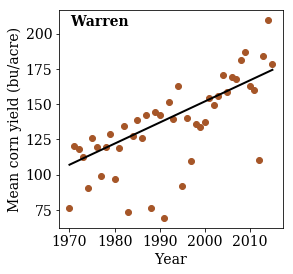

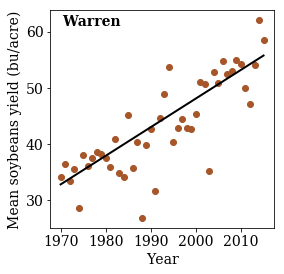

18045
2019-05-01 21:37:38.155115 get_avg_result
2019-05-01 21:37:38.158650 generate_yield_vs_year_plot


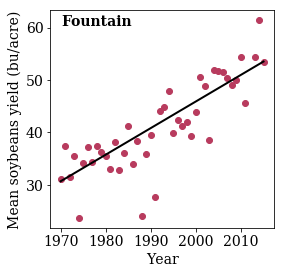

18107
2019-05-01 21:37:38.621759 get_avg_result
2019-05-01 21:37:38.625541 generate_yield_vs_year_plot


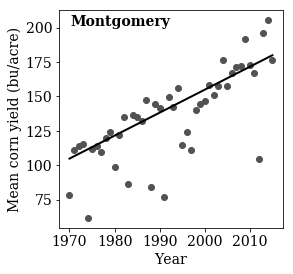

18023
2019-05-01 21:37:39.081505 get_avg_result
2019-05-01 21:37:39.085277 generate_yield_vs_year_plot


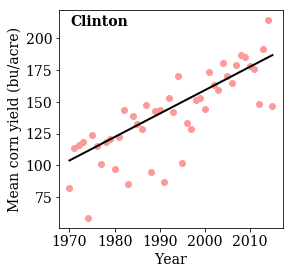

In [17]:
ls_county_res = generate_all_county_plots('average',get_average_result,IN_data)

corn
Pulaski [ -3.00743493e+03   1.57124568e+00] 0.502740363198
White [ -3.81767942e+03   1.98633143e+00] 0.53198012602
Cass [ -3.13570248e+03   1.64198249e+00] 0.54031724878
Benton [ -3.18182470e+03   1.66928075e+00] 0.447025206407
Carroll [ -3.45786434e+03   1.80681476e+00] 0.617157074212
Tippecanoe [ -3.29987090e+03   1.72590639e+00] 0.533300467194
Warren [ -2.84198938e+03   1.49692450e+00] 0.455442481956
Fountain [ -3.03618878e+03   1.59418489e+00] 0.465494185959
Montgomery [ -3.18225285e+03   1.66855476e+00] 0.525488498695
Clinton [ -3.51873807e+03   1.83892800e+00] 0.597715052825
Slope mean: 1.70001536424 std: 0.13699630851
R2 mean: 0.521666070524 std: 0.0538298069111
soybeans
Pulaski [ -7.14342535e+02   3.78066412e-01] 0.499791651093
White [ -9.21481207e+02   4.84397107e-01] 0.647499285824
Cass [ -8.26129062e+02   4.36833037e-01] 0.640510130902
Benton [ -8.59048409e+02   4.53793307e-01] 0.574265832984
Carroll [ -1.13108367e+03   5.91125701e-01] 0.673866352322
Tippecanoe [ -9.298

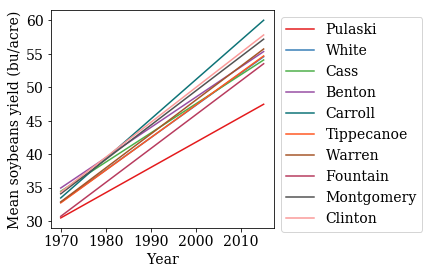

In [18]:
print('corn')
d = []
r = []
for idx in range(len(ls_county_res)):
    r2 = calculate_rsquare(ls_county_res[idx][1]['corn_res']['y'],ls_county_res[idx][1]['corn_res']['ls_pred'])
    print(county_dict[ls_county_res[idx][0]],ls_county_res[idx][1]['corn_res']['least_square_coeff'],r2)
    d.append(ls_county_res[idx][1]['corn_res']['least_square_coeff'][1])
    r.append(r2)
print('Slope','mean:',np.mean(d),'std:',np.std(d))
print('R2','mean:',np.mean(r),'std:',np.std(r))

d = []
r = []
print('soybeans')
for idx in range(len(ls_county_res)):
    r2 = calculate_rsquare(ls_county_res[idx][1]['soybeans_res']['y'],ls_county_res[idx][1]['soybeans_res']['ls_pred'])
    print(county_dict[ls_county_res[idx][0]],ls_county_res[idx][1]['soybeans_res']['least_square_coeff'],r2)
    d.append(ls_county_res[idx][1]['soybeans_res']['least_square_coeff'][1])
    r.append(r2)
print('Slope','mean:',np.mean(d),'std:',np.std(d))
print('R2','mean:',np.mean(r),'std:',np.std(r))
    
corn_data_dict_list = []
soybeans_data_dict_list = []
for idx in range(len(ls_county_res)):
    data_dict = {'x':ls_county_res[idx][1]['corn_res']['x'],
                 'y':ls_county_res[idx][1]['corn_res']['ls_pred'],
                 'color':'q'+str(idx+1),
                 'label':county_dict[ls_county_res[idx][0]]}
    corn_data_dict_list.append(data_dict)
    data_dict = {'x':ls_county_res[idx][1]['soybeans_res']['x'],
                 'y':ls_county_res[idx][1]['soybeans_res']['ls_pred'],
                 'color':'q'+str(idx+1),
                 'label':county_dict[ls_county_res[idx][0]]}
    soybeans_data_dict_list.append(data_dict)
    
CP().generate_plot_multi(corn_data_dict_list,
                         file_path=plot_path+'LS_lines_corn_whin_counties',
                         bbox_to_anchor=(1.0,1.0),
                         xlabel='Year',
                         ylabel='Mean corn yield (bu/acre)')

CP().generate_plot_multi(soybeans_data_dict_list,
                         file_path=plot_path+'LS_lines_soybeans_whin_counties',
                         bbox_to_anchor=(1.0,1.0),
                         xlabel='Year',
                         ylabel='Mean soybeans yield (bu/acre)')